# outliers

# tabelle e grafici

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Crea un DataFrame di esempio
data = {'Valori': [1, 2, 3, 4, 5, 10, 15, 20, 25, 300, 1000, 100000000, -50000000, -50]}
df = pd.DataFrame(data)
# Lista con outliers da entrambi i lati

# Calcola la media e la deviazione standard
mean_value = df['Valori'].mean()
std_dev = df['Valori'].std()
std_dev

30786384.39895254

In [2]:

# Identifica gli outliers considerando ±3 sigma dalla media
outliers = df[(df['Valori'] > mean_value + 3 * std_dev) | (df['Valori'] < mean_value - 3 * std_dev)]
outliers


,Valori
11,100000000


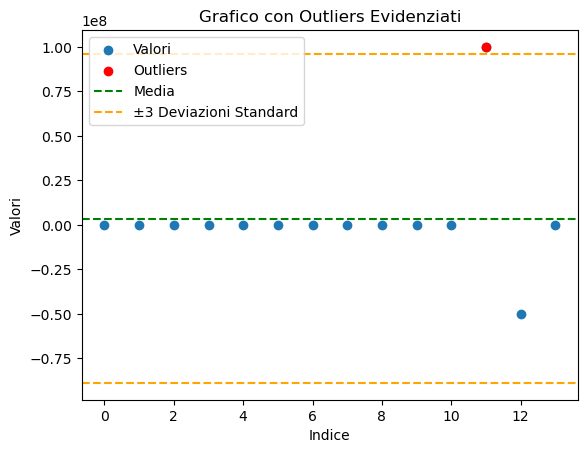

In [3]:
# Crea un grafico a dispersione
plt.scatter(df.index, df['Valori'], label='Valori')

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers.index, outliers['Valori'], color='red', label='Outliers')

# Aggiungi la media e la deviazione standard al grafico
plt.axhline(y=mean_value, color='green', linestyle='--', label='Media')
plt.axhline(y=mean_value + 3 * std_dev, color='orange', linestyle='--', label='±3 Deviazioni Standard')
plt.axhline(y=mean_value - 3 * std_dev, color='orange', linestyle='--')

# Aggiungi etichette e legenda al grafico
plt.xlabel('Indice')
plt.ylabel('Valori')
plt.title('Grafico con Outliers Evidenziati')
plt.legend()

# Mostra il grafico
plt.show()


# feature

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Crea un DataFrame di esempio con 4 features
data = {'Feature1': [1, 200, 3, 4, 50000, 10, 15, 20, 2500000, 300000000, 100000000],
        'Feature2': [2, 4, 6, 8, 10, 20, 30, 40, 500, 60, 200],
        'Feature3': [5, 10, 15, 20000, 25, 50, 75, 100, 125, 150, 500000],
        'Feature4': [1, -200000, 3, 4000000000, 5, 10, 15, 20, 200, 30, 10000]}

df = pd.DataFrame(data)

# Definisci il numero minimo di features che devono superare la soglia per considerare un dato un outlier
min_features_threshold = 1
k=3 #intervallo di confidenza 

# Lista per salvare gli indici degli outliers
outlier_indices = []

# Itera su ogni feature
for feature in df.columns:
    mean_value = df[feature].mean()
    std_dev = df[feature].std()    
    # Identifica gli outliers per ciascuna feature
    df['Outlier_' + feature] = (df[feature] > mean_value + k * std_dev) | (df[feature] < mean_value - k * std_dev)
df

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4
0,1,2,5,1,False,False,False,False
1,200,4,10,-200000,False,False,False,False
2,3,6,15,3,False,False,False,False
3,4,8,20000,4000000000,False,False,False,True
4,50000,10,25,5,False,False,False,False
5,10,20,50,10,False,False,False,False
6,15,30,75,15,False,False,False,False
7,20,40,100,20,False,False,False,False
8,2500000,500,125,200,False,False,False,False
9,300000000,60,150,30,False,False,False,False


In [5]:
# Calcola il numero di features che superano la soglia per ogni riga
df['Num_Outliers'] = df.filter(like='Outlier_').sum(axis=1)
df

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4,Num_Outliers
0,1,2,5,1,False,False,False,False,0
1,200,4,10,-200000,False,False,False,False,0
2,3,6,15,3,False,False,False,False,0
3,4,8,20000,4000000000,False,False,False,True,1
4,50000,10,25,5,False,False,False,False,0
5,10,20,50,10,False,False,False,False,0
6,15,30,75,15,False,False,False,False,0
7,20,40,100,20,False,False,False,False,0
8,2500000,500,125,200,False,False,False,False,0
9,300000000,60,150,30,False,False,False,False,0


In [6]:
# Filtra i dati per mantenere solo le righe con almeno il numero minimo di features superanti la soglia
outliers = df[df['Num_Outliers'] >= min_features_threshold]
outliers

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4,Num_Outliers
3,4,8,20000,4000000000,False,False,False,True,1
10,100000000,200,500000,10000,False,False,True,False,1


In [7]:
# Aggiungi una colonna che indica se il record è un outlier o meno
df['Is_Outlier'] = df.index.isin(outliers.index)
# Rimuovi colonne ausiliarie
df.drop(df.filter(like='Outlier_').columns, axis=1, inplace=True)
df.drop('Num_Outliers', axis=1, inplace=True)
df


,Feature1,Feature2,Feature3,Feature4,Is_Outlier
0,1,2,5,1,False
1,200,4,10,-200000,False
2,3,6,15,3,False
3,4,8,20000,4000000000,True
4,50000,10,25,5,False
5,10,20,50,10,False
6,15,30,75,15,False
7,20,40,100,20,False
8,2500000,500,125,200,False
9,300000000,60,150,30,False


4

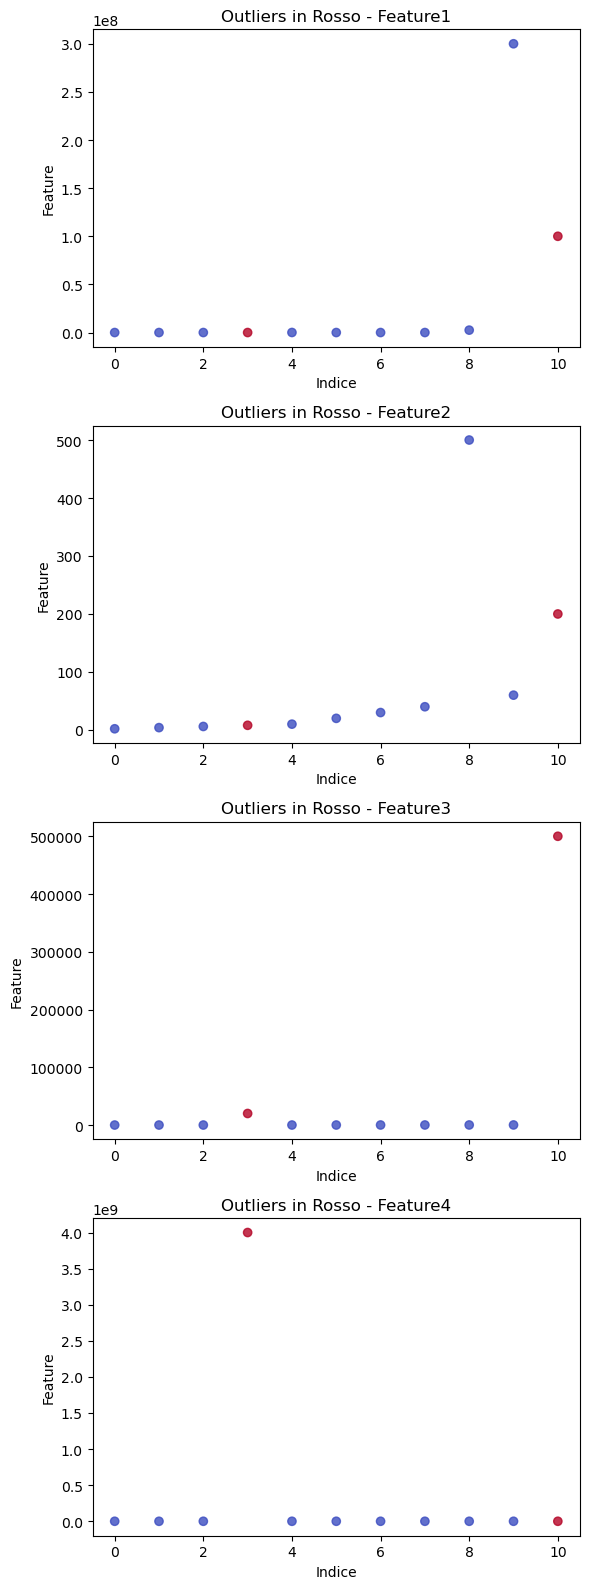

In [9]:
# Organizza i grafici in una matrice, con una colonna e 4 righe
num_features = len(df.columns) - 1  # Escludi la colonna 'Is_Outlier'
num_features
num_rows = num_features
num_cols = 1  # Una colonna

plt.figure(figsize=(6, 4 * num_rows))
for i, feature in enumerate(df.columns[:-1]):  # Escludi la colonna 'Is_Outlier'
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(df.index, df[feature], c=df['Is_Outlier'], cmap='coolwarm', alpha=0.8)
    plt.title(f'Outliers in Rosso - {feature}')
    plt.xlabel('Indice')
    plt.ylabel('Feature')

plt.tight_layout()
plt.show()





In [10]:
# Elimina le righe corrispondenti agli outliers quelli che hanno almeno una features fuoriscala
df_filtered = df[df['Is_Outlier'] == False]
df_filtered

,Feature1,Feature2,Feature3,Feature4,Is_Outlier
0,1,2,5,1,False
1,200,4,10,-200000,False
2,3,6,15,3,False
4,50000,10,25,5,False
5,10,20,50,10,False
6,15,30,75,15,False
7,20,40,100,20,False
8,2500000,500,125,200,False
9,300000000,60,150,30,False


In [1]:
def calcola_deviazione_standard(lista):
    n = len(lista)
    
    # Calcola la media
    media = sum(lista) / n
    
    # Calcola la somma dei quadrati delle differenze dalla media
    somma_quadrati_diff = sum((x - media) ** 2 for x in lista)
    
    # Calcola la deviazione standard
    deviazione_standard = (somma_quadrati_diff / n) ** 0.5
    
    return deviazione_standard

# Esempio di utilizzo
numero_lista = [1, 2, 3, 4, 50]
deviazione_standard = calcola_deviazione_standard(numero_lista)

# Stampa il risultato
print(f"La deviazione standard della lista è: {deviazione_standard}")




La deviazione standard della lista è: 19.026297590440446
